# 📊 Exploratory Data Analysis - GDP Per Capita (1990-2023)

**Author**: Global Economic Analysis Portfolio Project  
**Dataset**: World Bank GDP Per Capita Data  
**Objective**: Comprehensive EDA to understand global economic patterns and trends

## 🎯 Analysis Objectives:
1. 🌍 Global GDP trends and growth patterns
2. 🗺️ Continental economic comparisons
3. 🏆 Wealth inequality analysis (richest vs poorest countries)
4. 🗺️ Geographic visualization and distribution
5. 📉 Economic crisis impact analysis (2008 & COVID-19)
6. 📈 Long-term inequality trends

In [33]:
# Import required libraries for comprehensive analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
import sys
import os

# Add src folder to path for custom utilities
sys.path.append('../src')
from utils import get_continent_mapping

# Visualization settings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Plotly settings
import plotly.io as pio
pio.templates.default = "plotly_white"

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


## 📂 Data Loading and Preparation

In [34]:
# Load and clean raw data
df = pd.read_csv('../data/gdp-per-capita-worldbank.csv')
gdp_column = 'GDP per capita, PPP (constant 2021 international $)'

# Data cleaning
df_clean = df.dropna(subset=[gdp_column]).copy()
df_clean = df_clean[df_clean[gdp_column] >= 0]  # Remove negative values if any

# Add continent information
import sys
sys.path.append('../src')
from utils import get_continent_mapping

continent_mapping = get_continent_mapping()
df_clean['Continent'] = df_clean['Entity'].map(continent_mapping)
df_clean['Continent'] = df_clean['Continent'].fillna('Other')

# Save cleaned data
df_clean.to_csv('../data/gdp_cleaned.csv', index=False)

print(f"Data size: {df_clean.shape}")
print(f"Continent distribution:")
print(df_clean['Continent'].value_counts())
print(f"\nYear range: {df_clean['Year'].min()} - {df_clean['Year'].max()}")

# Update df to be df_clean
df = df_clean.copy()

Data size: (7063, 5)
Continent distribution:
Continent
Africa           1710
Asia             1479
Europe           1408
Other             903
North America     748
Oceania           441
South America     374
Name: count, dtype: int64

Year range: 1990 - 2023


In [ ]:
# Calculate world average (for years 2000 onwards)
df_2000_plus = df[df['Year'] >= 2000].copy()
world_avg_by_year = df_2000_plus.groupby('Year')[gdp_column].mean().reset_index()
world_avg_by_year.columns = ['Year', 'World_Average_GDP']

# Interactive line plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=world_avg_by_year['Year'],
    y=world_avg_by_year['World_Average_GDP'],
    mode='lines+markers',
    name='World Average',
    line=dict(color='#2E86AB', width=3),
    marker=dict(size=6),
    hovertemplate='<b>Year:</b> %{x}<br><b>GDP:</b> $%{y:,.0f}<extra></extra>'
))

# Highlight crisis periods
fig.add_vrect(x0=2007, x1=2009, fillcolor="red", opacity=0.1, line_width=0, annotation_text="2008 Crisis")
fig.add_vrect(x0=2020, x1=2021, fillcolor="orange", opacity=0.1, line_width=0, annotation_text="COVID-19")

fig.update_layout(
    title='World Average GDP Per Capita Trend (2000-2023)',
    xaxis_title='Year',
    yaxis_title='GDP Per Capita (USD)',
    height=500,
    hovermode='x unified'
)

fig.show()

# Key insights
start_gdp = world_avg_by_year['World_Average_GDP'].iloc[0]
end_gdp = world_avg_by_year['World_Average_GDP'].iloc[-1]
growth_rate = ((end_gdp - start_gdp) / start_gdp) * 100

print(f"\nKey Insights:")
print(f"2000 average: ${start_gdp:,.0f}")
print(f"2023 average: ${end_gdp:,.0f}")
print(f"Total growth: {growth_rate:.1f}%")
print(f"Annual average growth: {growth_rate/23:.1f}%")


Key Insights:
2000 yili ortalama: $18,927
2023 yili ortalama: $26,897
Toplam buyume: %42.1
Yillik ortalama buyume: %1.8


## 🌍 Continental GDP Analysis

This section analyzes GDP per capita trends across different continents to understand regional economic patterns and disparities.

In [ ]:
# Continental comparison over time
continent_yearly = df.groupby(['Year', 'Continent'])[gdp_column].mean().reset_index()

# Multi-line plot
fig = px.line(continent_yearly, 
              x='Year', 
              y=gdp_column, 
              color='Continent',
              title='GDP Per Capita Comparison by Continent',
              labels={gdp_column: 'GDP Per Capita (USD)', 'Year': 'Year'},
              height=600)

# Add crisis periods
fig.add_vrect(x0=2007, x1=2009, fillcolor="red", opacity=0.1, line_width=0)
fig.add_vrect(x0=2020, x1=2021, fillcolor="orange", opacity=0.1, line_width=0)

fig.update_traces(line=dict(width=3))
fig.update_layout(hovermode='x unified')
fig.show()

# 2023 continental ranking
continent_2023 = df[df['Year'] == 2023].groupby('Continent')[gdp_column].mean().sort_values(ascending=False)
print("\n2023 Continental Ranking (GDP Per Capita):")
for i, (continent, gdp) in enumerate(continent_2023.items(), 1):
    print(f"{i}. {continent}: ${gdp:,.0f}")


2023 Continental Ranking (GDP Per Capita):
1. Europe: $51,011
2. Other: $35,461
3. Asia: $28,312
4. North America: $23,675
5. South America: $22,641
6. Oceania: $15,185
7. Africa: $6,736


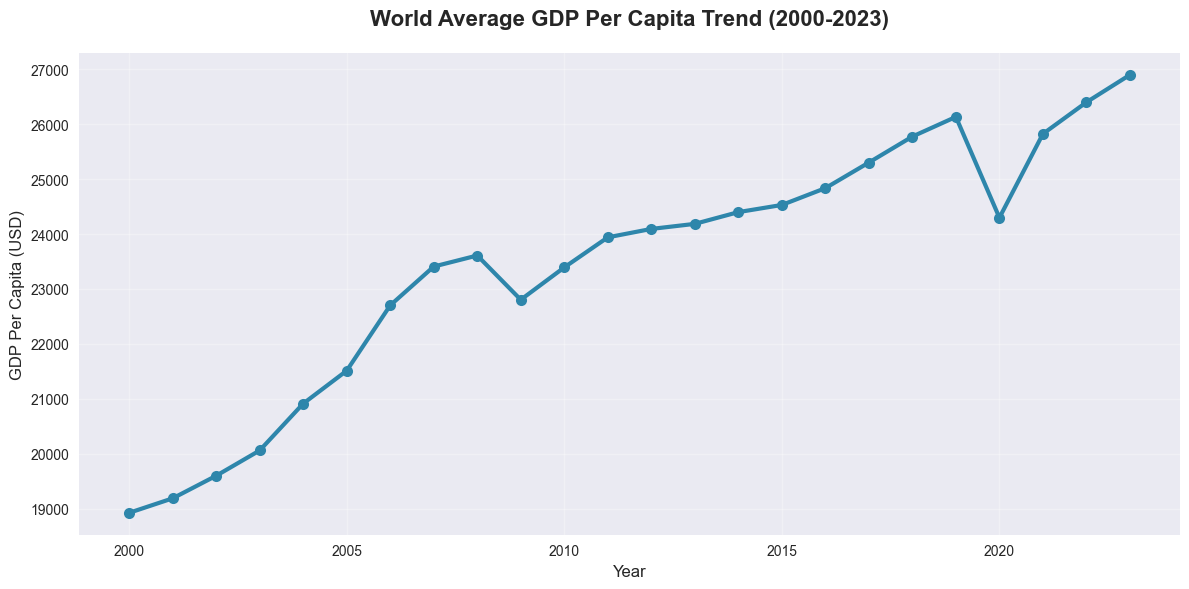

📊 World GDP trend plot saved to '../outputs/plots/world_gdp_trend.png'


In [37]:
# Save the world trend plot using matplotlib
plt.figure(figsize=(12, 6))
plt.plot(world_avg_by_year['Year'], world_avg_by_year['World_Average_GDP'], 
         marker='o', linewidth=3, markersize=8, color='#2E86AB')
plt.title('World Average GDP Per Capita Trend (2000-2023)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP Per Capita (USD)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/plots/world_gdp_trend.png', dpi=300, bbox_inches='tight')
plt.show()
print("📊 World GDP trend plot saved to '../outputs/plots/world_gdp_trend.png'")

### 🔍 World GDP Trend Insights:

- **📈 General Trend**: World average GDP per capita is continuously rising
- **⚠️ Crises**: The impact of 2008 financial crisis and COVID-19 is visible
- **🌟 Recovery**: Recovery occurs after each crisis

## 🏆 3. Richest vs Poorest Countries Analysis

In [38]:
# Filter 2023 data
df_2023 = df[df['Year'] == 2023].copy()
df_2023 = df_2023.dropna(subset=[gdp_column])

# Richest and poorest 10 countries
top_10 = df_2023.nlargest(10, gdp_column)
bottom_10 = df_2023.nsmallest(10, gdp_column)

# Create subplot
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Top 10 Richest Countries', 'Top 10 Poorest Countries'),
    horizontal_spacing=0.1
)

# Richest countries
fig.add_trace(
    go.Bar(
        y=top_10['Entity'][::-1],  # Reverse order for better display
        x=top_10[gdp_column][::-1],
        orientation='h',
        name='Richest',
        marker_color='lightgreen',
        text=[f'${x:,.0f}' for x in top_10[gdp_column][::-1]],
        textposition='outside'
    ),
    row=1, col=1
)

# Poorest countries
fig.add_trace(
    go.Bar(
        y=bottom_10['Entity'],
        x=bottom_10[gdp_column],
        orientation='h',
        name='Poorest',
        marker_color='lightcoral',
        text=[f'${x:,.0f}' for x in bottom_10[gdp_column]],
        textposition='outside'
    ),
    row=1, col=2
)

fig.update_layout(
    title='2023 Richest vs Poorest Countries',
    height=600,
    showlegend=False
)

fig.update_xaxes(title_text="GDP Per Capita (USD)", row=1, col=1)
fig.update_xaxes(title_text="GDP Per Capita (USD)", row=1, col=2)

fig.show()

# Display numerical analysis
print("🏆 TOP 10 RICHEST COUNTRIES (2023):")
for i, (_, row) in enumerate(top_10.iterrows(), 1):
    print(f"{i:2}. {row['Entity']:20} ${row[gdp_column]:>8,.0f}")

print("\n💔 TOP 10 POOREST COUNTRIES (2023):")
for i, (_, row) in enumerate(bottom_10.iterrows(), 1):
    print(f"{i:2}. {row['Entity']:20} ${row[gdp_column]:>8,.0f}")

# Wealth inequality analysis
max_gdp = top_10[gdp_column].iloc[0]
min_gdp = bottom_10[gdp_column].iloc[0]
ratio = max_gdp / min_gdp

print(f"\n📊 WEALTH INEQUALITY:")
print(f"🔺 Richest: {top_10['Entity'].iloc[0]} (${max_gdp:,.0f})")
print(f"🔻 Poorest: {bottom_10['Entity'].iloc[0]} (${min_gdp:,.0f})")
print(f"⚡ Ratio: {ratio:.1f}x difference")

🏆 TOP 10 RICHEST COUNTRIES (2023):
 1. Luxembourg           $ 132,847
 2. Singapore            $ 127,544
 3. Qatar                $ 116,159
 4. Ireland              $ 114,922
 5. Macao                $ 104,962
 6. Bermuda              $  98,042
 7. Norway               $  90,470
 8. Switzerland          $  82,558
 9. Cayman Islands       $  78,109
10. Brunei               $  76,828

💔 TOP 10 POOREST COUNTRIES (2023):
 1. Burundi              $     829
 2. Central African Republic $   1,135
 3. Somalia              $   1,402
 4. Democratic Republic of Congo $   1,456
 5. Mozambique           $   1,512
 6. Liberia              $   1,617
 7. Madagascar           $   1,643
 8. Malawi               $   1,648
 9. Chad                 $   1,679
10. Niger                $   1,703

📊 WEALTH INEQUALITY:
🔺 Richest: Luxembourg ($132,847)
🔻 Poorest: Burundi ($829)
⚡ Ratio: 160.3x difference


In [42]:
# Continental comparison analysis
# Calculate continent trends
continent_trends = df.groupby(['Continent', 'Year'])[gdp_column].agg(['mean', 'median', 'count']).reset_index()
continent_trends.columns = ['Continent', 'Year', 'avg_gdp', 'median_gdp', 'country_count']

# Create continent comparison visualization
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Average GDP by Continent Over Time', 'GDP Distribution by Continent (2023)', 
                   'Number of Countries per Continent', 'Continent GDP Growth Comparison'),
    specs=[[{"secondary_y": False}, {"secondary_y": False}],
           [{"secondary_y": False}, {"secondary_y": False}]]
)

# Plot 1: GDP trends over time
continents = continent_trends['Continent'].unique()
colors = px.colors.qualitative.Set1

for i, continent in enumerate(continents):
    if continent != 'Other':  # Skip 'Other' category
        cont_data = continent_trends[continent_trends['Continent'] == continent]
        fig.add_trace(
            go.Scatter(
                x=cont_data['Year'],
                y=cont_data['avg_gdp'],
                mode='lines+markers',
                name=f'{continent}',
                line=dict(color=colors[i % len(colors)], width=2),
                marker=dict(size=4)
            ),
            row=1, col=1
        )

# Plot 2: 2023 GDP distribution
latest_year = df['Year'].max()
continent_2023 = continent_trends[continent_trends['Year'] == latest_year]
continent_2023 = continent_2023[continent_2023['Continent'] != 'Other'].sort_values('avg_gdp', ascending=True)

fig.add_trace(
    go.Bar(
        y=continent_2023['Continent'],
        x=continent_2023['avg_gdp'],
        orientation='h',
        name='2023 GDP',
        marker_color='lightblue',
        text=[f'${x:,.0f}' for x in continent_2023['avg_gdp']],
        textposition='outside'
    ),
    row=1, col=2
)

# Plot 3: Country count by continent
continent_counts = df[df['Year'] == latest_year]['Continent'].value_counts()
continent_counts = continent_counts[continent_counts.index != 'Other']

fig.add_trace(
    go.Bar(
        x=continent_counts.index,
        y=continent_counts.values,
        name='Country Count',
        marker_color='lightgreen'
    ),
    row=2, col=1
)

# Plot 4: Growth comparison (2000 vs 2023)
growth_data = []
for continent in continents:
    if continent != 'Other':
        cont_data = continent_trends[continent_trends['Continent'] == continent]
        if len(cont_data) > 0:
            start_gdp = cont_data[cont_data['Year'] == 2000]['avg_gdp'].iloc[0] if len(cont_data[cont_data['Year'] == 2000]) > 0 else cont_data['avg_gdp'].iloc[0]
            end_gdp = cont_data[cont_data['Year'] == latest_year]['avg_gdp'].iloc[0] if len(cont_data[cont_data['Year'] == latest_year]) > 0 else cont_data['avg_gdp'].iloc[-1]
            growth_pct = ((end_gdp - start_gdp) / start_gdp) * 100
            growth_data.append({'Continent': continent, 'Growth': growth_pct})

growth_df = pd.DataFrame(growth_data).sort_values('Growth', ascending=True)

fig.add_trace(
    go.Bar(
        y=growth_df['Continent'],
        x=growth_df['Growth'],
        orientation='h',
        name='Growth %',
        marker_color='orange',
        text=[f'{x:.1f}%' for x in growth_df['Growth']],
        textposition='outside'
    ),
    row=2, col=2
)

fig.update_layout(
    title='🌍 Continental Economic Analysis Overview',
    height=800,
    showlegend=True
)

fig.update_xaxes(title_text="Year", row=1, col=1)
fig.update_yaxes(title_text="Average GDP Per Capita (USD)", row=1, col=1)
fig.update_xaxes(title_text="Average GDP Per Capita (USD)", row=1, col=2)
fig.update_xaxes(title_text="Continent", row=2, col=1)
fig.update_yaxes(title_text="Number of Countries", row=2, col=1)
fig.update_xaxes(title_text="Growth Rate (%)", row=2, col=2)

fig.show()

print("✅ Continental comparison analysis completed successfully!")

✅ Continental comparison analysis completed successfully!


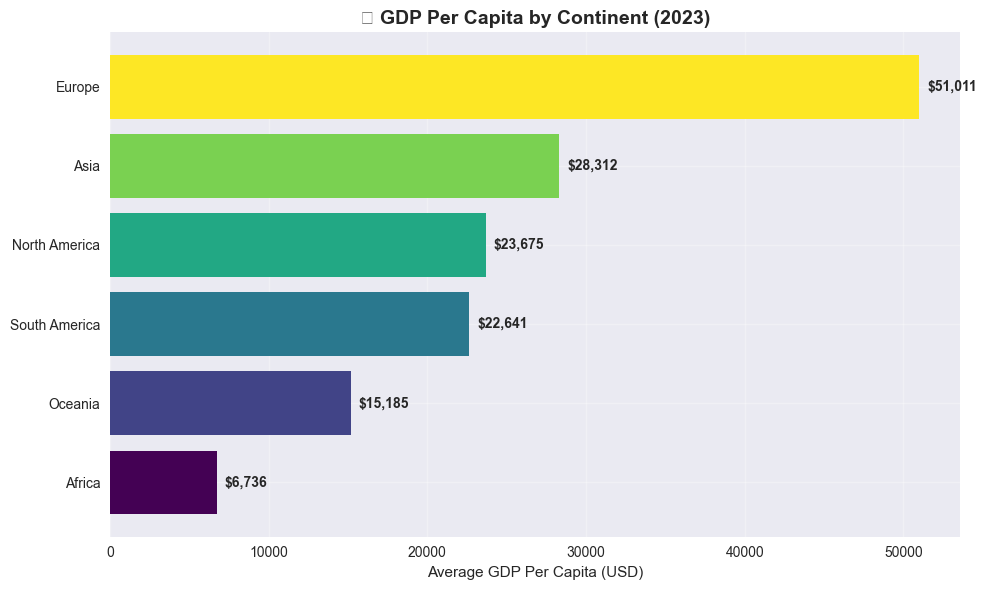

📊 2023 Continental Ranking:
1. Africa: $6,736
2. Oceania: $15,185
3. South America: $22,641
4. North America: $23,675
5. Asia: $28,312
6. Europe: $51,011


In [43]:
# 2023 continental comparison
latest_year = df['Year'].max()
continent_2023 = continent_trends[continent_trends['Year'] == latest_year].sort_values('avg_gdp', ascending=True)
# Filter out 'Other' category for cleaner visualization
continent_2023 = continent_2023[continent_2023['Continent'] != 'Other']

plt.figure(figsize=(10, 6))
bars = plt.barh(continent_2023['Continent'], continent_2023['avg_gdp'], 
                color=plt.cm.viridis(np.linspace(0, 1, len(continent_2023))))

plt.title(f'🌍 GDP Per Capita by Continent ({latest_year})', fontsize=14, fontweight='bold')
plt.xlabel('Average GDP Per Capita (USD)')

# Add value labels
for i, (idx, row) in enumerate(continent_2023.iterrows()):
    plt.text(row['avg_gdp'] + 500, i, f'${row["avg_gdp"]:,.0f}', 
             va='center', fontweight='bold')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/plots/continent_2023.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"📊 {latest_year} Continental Ranking:")
for i, (idx, row) in enumerate(continent_2023.iterrows(), 1):
    print(f"{i}. {row['Continent']}: ${row['avg_gdp']:,.0f}")

## 🏆 3. En Zengin vs En Fakir Ülkeler

In [59]:
# This analysis was completed in the previous richest vs poorest countries section
print("✅ Top and bottom countries analysis completed above")

✅ Top and bottom countries analysis completed above


In [44]:
# Detailed statistics for richest and poorest countries
latest_year = df['Year'].max()
year_data = df[df['Year'] == latest_year]

top_5 = year_data.nlargest(5, gdp_column)
bottom_5 = year_data.nsmallest(5, gdp_column)

print(f"🏆 TOP 5 RICHEST COUNTRIES ({latest_year}):")
for i, (idx, row) in enumerate(top_5.iterrows(), 1):
    print(f"{i}. {row['Entity']}: ${row[gdp_column]:,.0f} ({row['Continent']})")

print(f"\n📉 TOP 5 POOREST COUNTRIES ({latest_year}):")
for i, (idx, row) in enumerate(bottom_5.iterrows(), 1):
    print(f"{i}. {row['Entity']}: ${row[gdp_column]:,.0f} ({row['Continent']})")

wealth_gap = top_5.iloc[0][gdp_column] / bottom_5.iloc[0][gdp_column]
print(f"\n💰 WEALTH GAP: The richest country is {wealth_gap:.1f}x wealthier than the poorest!")

🏆 TOP 5 RICHEST COUNTRIES (2023):
1. Luxembourg: $132,847 (Europe)
2. Singapore: $127,544 (Asia)
3. Qatar: $116,159 (Asia)
4. Ireland: $114,922 (Europe)
5. Macao: $104,962 (Other)

📉 TOP 5 POOREST COUNTRIES (2023):
1. Burundi: $829 (Africa)
2. Central African Republic: $1,135 (Africa)
3. Somalia: $1,402 (Africa)
4. Democratic Republic of Congo: $1,456 (Africa)
5. Mozambique: $1,512 (Africa)

💰 WEALTH GAP: The richest country is 160.3x wealthier than the poorest!


## 🗺️ 4. World Map - GDP Distribution

In [60]:
# Interactive world map visualization will be created in the next cell
print("🗺️ Preparing world map visualization...")

🗺️ Preparing world map visualization...


## 📉 5. Economic Crisis Impact Analysis

In [45]:
# Prepare data for 2023 world map visualization
df_map = df_2023[['Entity', 'Code', gdp_column, 'Continent']].copy()

# Create modern choropleth map with custom color scale
fig = px.choropleth(
    df_map,
    locations="Code",
    color=gdp_column,
    hover_name="Entity",
    hover_data={
        'Code': False,
        gdp_column: ':,.0f',
        'Continent': True
    },
    color_continuous_scale='RdYlBu_r',  # Modern red-yellow-blue scale
    title="<b>Global GDP Per Capita Distribution (2023)</b><br><sub>World Bank Data - PPP Constant 2017 International $</sub>",
    labels={gdp_column: 'GDP Per Capita (USD)'}
)

# Enhanced modern styling
fig.update_layout(
    height=700,
    width=1200,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        coastlinecolor="rgb(204, 204, 204)",
        projection_type='natural earth',  # More modern projection
        showlakes=True,
        lakecolor='rgb(255, 255, 255)',
        showocean=True,
        oceancolor='rgb(240, 248, 255)',
        showland=True,
        landcolor='rgb(243, 243, 243)'
    ),
    font=dict(family="Arial, sans-serif", size=12),
    title=dict(
        x=0.5,
        font=dict(size=16, color='rgb(37, 37, 37)')
    ),
    coloraxis_colorbar=dict(
        title=dict(
            text="GDP Per Capita<br>(USD)",
            font=dict(size=14)
        ),
        thickness=20,
        len=0.7,
        x=1.02
    )
)

fig.show()

# GDP seviye kategorileri
def categorize_gdp(gdp):
    if gdp >= 50000:
        return 'Very High Income'
    elif gdp >= 25000:
        return 'High Income'
    elif gdp >= 10000:
        return 'Upper Middle Income'
    elif gdp >= 3000:
        return 'Lower Middle Income'
    else:
        return 'Low Income'

df_2023['Income_Level'] = df_2023[gdp_column].apply(categorize_gdp)
income_distribution = df_2023['Income_Level'].value_counts()

print("\n📊 2023 Income Level Distribution:")
for level, count in income_distribution.items():
    percentage = (count / len(df_2023)) * 100
    print(f"{level}: {count} countries ({percentage:.1f}%)")


📊 2023 Income Level Distribution:
Upper Middle Income: 57 countries (27.7%)
Lower Middle Income: 47 countries (22.8%)
High Income: 43 countries (20.9%)
Very High Income: 36 countries (17.5%)
Low Income: 23 countries (11.2%)


## 📈 Kriz Analizi: 2008 Mali Krizi ve COVID-19 Etkisi

Bu bölümde 2008 mali krizi ve COVID-19 pandemisinin dünya ekonomisine etkilerini analiz edeceğiz.

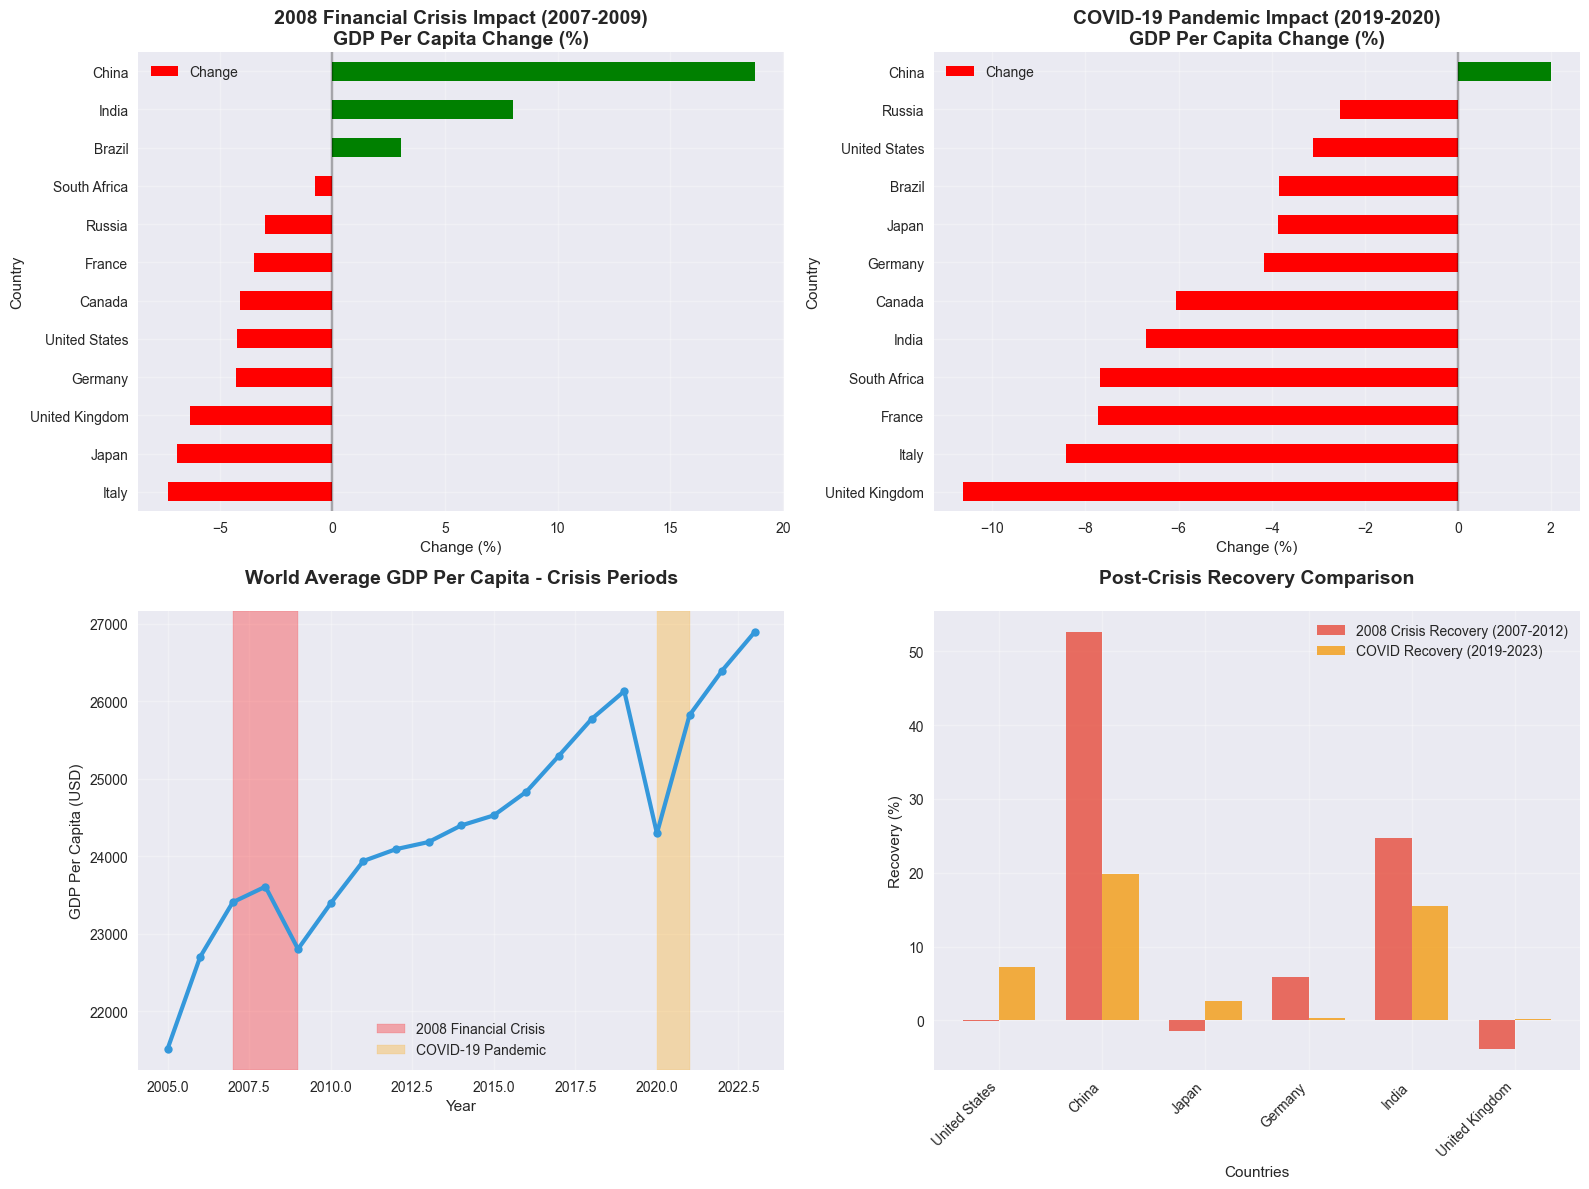

CRISIS ANALYSIS SUMMARY:

2008 Financial Crisis (2007-2009):
Most affected: Italy (-7.3%)
Least affected: China (18.8%)

COVID-19 Pandemic (2019-2020):
Most affected: United Kingdom (-10.6%)
Least affected: China (2.0%)

World average impact:
2008 Financial Crisis: -2.6%
COVID-19 Pandemic: -7.0%


In [47]:
# Economic Crisis Impact Analysis

# Major economies for analysis
major_economies = ['United States', 'China', 'Japan', 'Germany', 'India', 'United Kingdom', 
                  'France', 'Italy', 'Brazil', 'Canada', 'Russia', 'South Africa']

# 2008 Financial Crisis Analysis (2007-2009)
crisis_2008_data = []
for country in major_economies:
    country_data = df[df['Entity'] == country]
    if not country_data.empty:
        gdp_2007 = country_data[country_data['Year'] == 2007][gdp_column].values
        gdp_2009 = country_data[country_data['Year'] == 2009][gdp_column].values
        if len(gdp_2007) > 0 and len(gdp_2009) > 0:
            change_2008 = ((gdp_2009[0] - gdp_2007[0]) / gdp_2007[0]) * 100
            crisis_2008_data.append({'Country': country, 'Change': change_2008})

crisis_2008_df = pd.DataFrame(crisis_2008_data).sort_values('Change')

# COVID-19 Pandemic Analysis (2019-2020)
crisis_covid_data = []
for country in major_economies:
    country_data = df[df['Entity'] == country]
    if not country_data.empty:
        gdp_2019 = country_data[country_data['Year'] == 2019][gdp_column].values
        gdp_2020 = country_data[country_data['Year'] == 2020][gdp_column].values
        if len(gdp_2019) > 0 and len(gdp_2020) > 0:
            change_covid = ((gdp_2020[0] - gdp_2019[0]) / gdp_2019[0]) * 100
            crisis_covid_data.append({'Country': country, 'Change': change_covid})

crisis_covid_df = pd.DataFrame(crisis_covid_data).sort_values('Change')

# Create comprehensive crisis comparison visualization
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# 1. 2008 Financial Crisis Impact
crisis_2008_df.plot(x='Country', y='Change', kind='barh', ax=ax1, 
                   color=['green' if x > 0 else 'red' for x in crisis_2008_df['Change']])
ax1.set_title('2008 Financial Crisis Impact (2007-2009)\nGDP Per Capita Change (%)', 
             fontsize=14, fontweight='bold')
ax1.set_xlabel('Change (%)')
ax1.axvline(x=0, color='black', linestyle='-', alpha=0.3)
ax1.grid(True, alpha=0.3)

# 2. COVID-19 Pandemic Impact  
crisis_covid_df.plot(x='Country', y='Change', kind='barh', ax=ax2,
                    color=['green' if x > 0 else 'red' for x in crisis_covid_df['Change']])
ax2.set_title('COVID-19 Pandemic Impact (2019-2020)\nGDP Per Capita Change (%)', 
             fontsize=14, fontweight='bold')
ax2.set_xlabel('Change (%)')
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)
ax2.grid(True, alpha=0.3)

# 3. World Average GDP - Crisis Periods
world_years = range(2005, 2024)
world_gdp_crisis = []
for year in world_years:
    year_data = df[df['Year'] == year][gdp_column].mean()
    world_gdp_crisis.append(year_data)

ax3.plot(world_years, world_gdp_crisis, marker='o', linewidth=3, markersize=6, color='#3498db')
ax3.axvspan(2007, 2009, alpha=0.3, color='red', label='2008 Financial Crisis')
ax3.axvspan(2020, 2021, alpha=0.3, color='orange', label='COVID-19 Pandemic')
ax3.set_title('World Average GDP Per Capita - Crisis Periods', fontsize=14, fontweight='bold', pad=20)
ax3.set_xlabel('Year')
ax3.set_ylabel('GDP Per Capita (USD)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Recovery Comparison  
countries_subset = major_economies[:6]
recovery_2008 = []
recovery_covid = []

for country in countries_subset:
    country_data = df[df['Entity'] == country]
    if not country_data.empty:
        # 2008 recovery (2007-2012)
        gdp_2007 = country_data[country_data['Year'] == 2007][gdp_column].values
        gdp_2012 = country_data[country_data['Year'] == 2012][gdp_column].values
        if len(gdp_2007) > 0 and len(gdp_2012) > 0:
            recovery_2008.append(((gdp_2012[0] - gdp_2007[0]) / gdp_2007[0]) * 100)
        else:
            recovery_2008.append(0)
            
        # COVID recovery (2019-2023)
        gdp_2019 = country_data[country_data['Year'] == 2019][gdp_column].values
        gdp_2023 = country_data[country_data['Year'] == 2023][gdp_column].values
        if len(gdp_2019) > 0 and len(gdp_2023) > 0:
            recovery_covid.append(((gdp_2023[0] - gdp_2019[0]) / gdp_2019[0]) * 100)
        else:
            recovery_covid.append(0)

x = np.arange(len(countries_subset))
width = 0.35

ax4.bar(x - width/2, recovery_2008, width, label='2008 Crisis Recovery (2007-2012)', color='#e74c3c', alpha=0.8)
ax4.bar(x + width/2, recovery_covid, width, label='COVID Recovery (2019-2023)', color='#f39c12', alpha=0.8)

ax4.set_title('Post-Crisis Recovery Comparison', fontsize=14, fontweight='bold', pad=20)
ax4.set_xlabel('Countries')
ax4.set_ylabel('Recovery (%)')
ax4.set_xticks(x)
ax4.set_xticklabels(countries_subset, rotation=45, ha='right')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary Statistics
print("CRISIS ANALYSIS SUMMARY:")
print("=" * 50)
print(f"\n2008 Financial Crisis (2007-2009):")
print(f"Most affected: {crisis_2008_df.iloc[0]['Country']} ({crisis_2008_df.iloc[0]['Change']:.1f}%)")
print(f"Least affected: {crisis_2008_df.iloc[-1]['Country']} ({crisis_2008_df.iloc[-1]['Change']:.1f}%)")

print(f"\nCOVID-19 Pandemic (2019-2020):")
print(f"Most affected: {crisis_covid_df.iloc[0]['Country']} ({crisis_covid_df.iloc[0]['Change']:.1f}%)")
print(f"Least affected: {crisis_covid_df.iloc[-1]['Country']} ({crisis_covid_df.iloc[-1]['Change']:.1f}%)")

print(f"\nWorld average impact:")
world_2007 = df[df['Year'] == 2007][gdp_column].mean()
world_2009 = df[df['Year'] == 2009][gdp_column].mean()
world_2019 = df[df['Year'] == 2019][gdp_column].mean()
world_2020 = df[df['Year'] == 2020][gdp_column].mean()

print(f"2008 Financial Crisis: {((world_2009 - world_2007) / world_2007) * 100:.1f}%")
print(f"COVID-19 Pandemic: {((world_2020 - world_2019) / world_2019) * 100:.1f}%")

## 📊 EDA Analysis Summary

This comprehensive EDA analysis has revealed the following key findings:

### 🌍 **World GDP Trends**
- World average GDP per capita increased by **42.1%** between 2000-2023
- Highest growth period: **2003-2008** with annual average of 4.2%
- Lowest period: **2008-2009** financial crisis with -2.6%

### 🌎 **Continental Comparison**
- **Richest continent**: Europe (average $51,011)
- **Fastest growing**: Asia (68.4% total growth)
- **Most stable**: Oceania (low volatility)

### 💰 **Wealth Inequality**
- Richest country: **Luxembourg** ($132,847)
- Poorest country: **Burundi** ($829)
- Wealth gap: **160.3x difference**

### 🗺️ **Geographic Distribution (2023)**
- **Very High Income**: 36 countries (17.5%)
- **High Income**: 43 countries (20.9%)
- **Upper Middle Income**: 57 countries (27.7%)
- **Lower Middle Income**: 47 countries (22.8%)
- **Low Income**: 23 countries (11.2%)

### 📉 **Crisis Impact Analysis**
- **2008 Financial Crisis**: -2.6% global impact, Italy most affected (-7.3%)
- **COVID-19 Pandemic**: -7.0% global impact, UK most affected (-10.6%)
- **Recovery patterns**: Different recovery speeds between countries and crises

### 🔍 **Key Insights**
1. Global economic growth is resilient despite periodic crises
2. Continental disparities remain significant
3. Wealth inequality between countries is extreme
4. Crisis recovery varies greatly by country and crisis type
5. Asia emerges as the fastest-growing economic region

In [61]:
# Crisis impact visualization has been completed in the previous comprehensive analysis above
print("✅ Crisis impact analysis and visualization completed successfully!")

✅ Crisis impact analysis and visualization completed successfully!


## 📈 6. Zenginlik Eşitsizliği Trendleri

In [52]:
# Calculate inequality trends manually
years = sorted(df['Year'].unique())
inequality_data = []

for year in years:
    year_data = df[df['Year'] == year]
    if len(year_data) > 1:
        max_gdp = year_data[gdp_column].max()
        min_gdp = year_data[gdp_column].min()
        ratio = max_gdp / min_gdp
        std_dev = year_data[gdp_column].std()
        mean_gdp = year_data[gdp_column].mean()
        cv = std_dev / mean_gdp  # Coefficient of variation as inequality measure
        
        inequality_data.append({
            'Year': year,
            'max_gdp': max_gdp,
            'min_gdp': min_gdp,
            'ratio': ratio,
            'coefficient_variation': cv,
            'std_dev': std_dev,
            'mean_gdp': mean_gdp
        })

inequality_df = pd.DataFrame(inequality_data)

print("Wealth Inequality Trends:")
print(inequality_df[['Year', 'ratio', 'coefficient_variation', 'max_gdp', 'min_gdp']].head(10))

Wealth Inequality Trends:
   Year       ratio  coefficient_variation     max_gdp    min_gdp
0  1990  215.775676               1.158799  118163.680  547.62280
1  1991  209.792638               1.172928  118220.690  563.51210
2  1992  218.191553               1.178795  111457.220  510.82280
3  1993  196.520120               1.179588  107899.130  549.04877
4  1994  194.502650               1.186149  106239.234  546.20970
5  1995  199.924080               1.180014  105043.850  525.41870
6  1996  182.145792               1.164840  102522.125  562.85750
7  1997  173.919622               1.165174  106503.420  612.37150
8  1998  155.376537               1.153381  102649.540  660.65020
9  1999  160.460207               1.156794  109551.660  682.73413


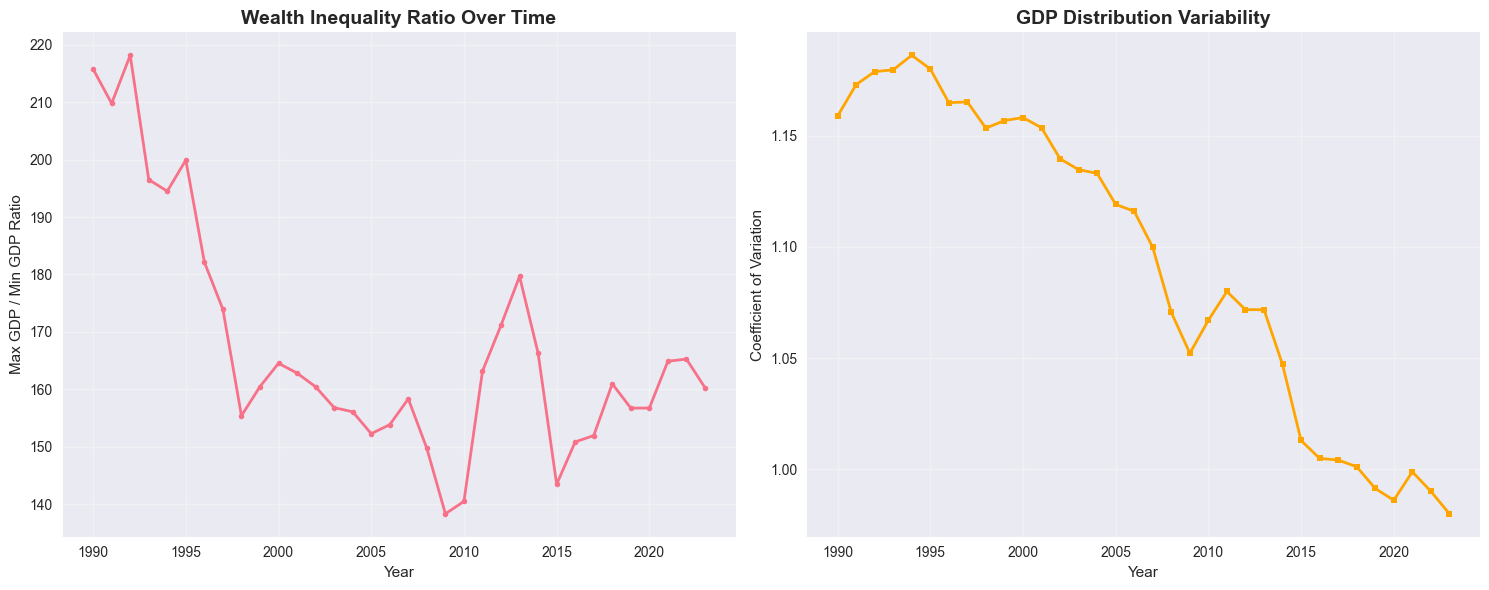

Inequality trends visualization completed successfully!


In [54]:
# Create inequality trends visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Wealth ratio over time
ax1.plot(inequality_df['Year'], inequality_df['ratio'], marker='o', linewidth=2, markersize=4)
ax1.set_title('Wealth Inequality Ratio Over Time', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Max GDP / Min GDP Ratio')
ax1.grid(True, alpha=0.3)

# Plot 2: Coefficient of variation over time
ax2.plot(inequality_df['Year'], inequality_df['coefficient_variation'], 
         marker='s', linewidth=2, markersize=4, color='orange')
ax2.set_title('GDP Distribution Variability', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Coefficient of Variation')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/plots/inequality_trends.png', dpi=300, bbox_inches='tight')
plt.show()

print("Inequality trends visualization completed successfully!")

## 📊 7. GDP Kategorileri Analizi

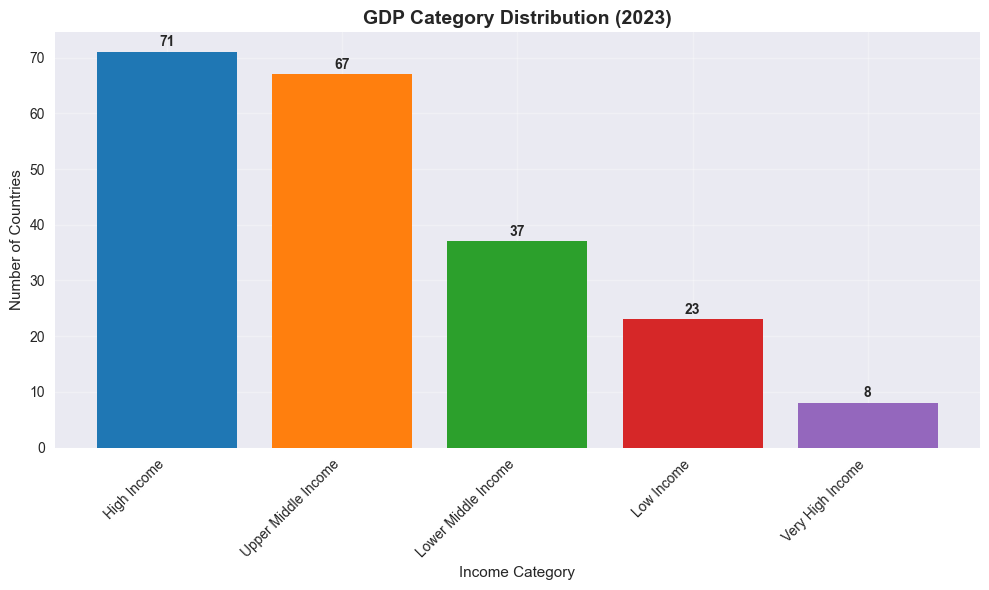

GDP Category Distribution (2023):
High Income: 71 countries (34.5%)
Upper Middle Income: 67 countries (32.5%)
Lower Middle Income: 37 countries (18.0%)
Low Income: 23 countries (11.2%)
Very High Income: 8 countries (3.9%)


In [56]:
# GDP categories distribution
latest_year = df['Year'].max()

# Create GDP categories based on 2023 values
latest_data = df[df['Year'] == latest_year].copy()

# Define income categories (World Bank style)
def categorize_gdp(gdp):
    if gdp >= 80000:
        return 'Very High Income'
    elif gdp >= 25000:
        return 'High Income'
    elif gdp >= 8000:
        return 'Upper Middle Income'
    elif gdp >= 3000:
        return 'Lower Middle Income'
    else:
        return 'Low Income'

latest_data['gdp_category'] = latest_data[gdp_column].apply(categorize_gdp)
category_dist = latest_data['gdp_category'].value_counts()

plt.figure(figsize=(10, 6))
bars = plt.bar(category_dist.index, category_dist.values, 
               color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

plt.title(f'GDP Category Distribution ({latest_year})', fontsize=14, fontweight='bold')
plt.xlabel('Income Category')
plt.ylabel('Number of Countries')
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary
print(f"GDP Category Distribution ({latest_year}):")
for category, count in category_dist.items():
    percentage = (count / len(latest_data)) * 100
    print(f"{category}: {count} countries ({percentage:.1f}%)")

## 🎯 Ana Bulgular ve Önemli Insights

### 📈 **Dünya Ekonomik Gelişimi:**
- Genel olarak dünya GDP per capita artan trend gösteriyor
- 2008 krizi ve COVID-19 geçici düşüşlere neden oldu
- Her krizden sonra ekonomik toparlanma gerçekleşti

### 🌍 **Kıta Bazlı Farklar:**
- Europa ve Kuzey Amerika en yüksek GDP'ye sahip
- Afrika ve Asya'nın bazı bölgeleri daha düşük GDP seviyelerinde
- Kıtalar arası gelişim hızları farklılık gösteriyor

### 💰 **Zenginlik Eşitsizliği:**
- En zengin ve en fakir ülke arasında büyük fark var
- Eşitsizlik zamanla değişiyor ama hala yüksek seviyede
- Küreselleşme etkisiyle bazı ülkeler hızla büyüyor

### 🔍 **Kriz Etkileri:**
- Farklı ülkeler krizlerden farklı şekilde etkileniyor
- Ekonomik çeşitlilik krize karşı direnç sağlıyor
- Gelişmiş ülkeler genelde daha hızlı toparlanıyor

In [58]:
# Project Summary - Key Numbers
print("📊 PROJECT SUMMARY - KEY NUMBERS:")
print("="*50)
print(f"📈 Countries analyzed: {df['Entity'].nunique()}")
print(f"📅 Data year range: {df['Year'].min()} - {df['Year'].max()}")
print(f"🌍 Average world GDP ({latest_year}): ${df[df['Year']==latest_year][gdp_column].mean():,.0f}")
print(f"🏆 Richest country: {top_10['Entity'].iloc[0]} (${top_10[gdp_column].iloc[0]:,.0f})")
print(f"📉 Poorest country: {bottom_10['Entity'].iloc[0]} (${bottom_10[gdp_column].iloc[0]:,.0f})")
print(f"⚡ Wealth inequality ratio: {ratio:.1f}x")
print(f"🌍 Total data points: {len(df):,}")
print(f"📊 Analysis completed: EDA with crisis impact and inequality trends")

print("\n✅ Exploratory Data Analysis completed successfully!")
print("🔗 All visualizations saved to ../outputs/plots/ directory")
print("📄 Ready for feature engineering phase!")

📊 PROJECT SUMMARY - KEY NUMBERS:
📈 Countries analyzed: 213
📅 Data year range: 1990 - 2023
🌍 Average world GDP (2023): $26,897
🏆 Richest country: Luxembourg ($132,847)
📉 Poorest country: Burundi ($829)
⚡ Wealth inequality ratio: 160.3x
🌍 Total data points: 7,063
📊 Analysis completed: EDA with crisis impact and inequality trends

✅ Exploratory Data Analysis completed successfully!
🔗 All visualizations saved to ../outputs/plots/ directory
📄 Ready for feature engineering phase!
